## Data preparation using Numpy/Pandas by Changik Choi
*** 

In [21]:
# Importing library
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [22]:
import datetime
# Quick look
rides=pd.read_csv('data/train.csv')
# Extract 'month' and 'hour' features from 'datetime'
rides.datetime = rides.datetime.apply(pd.to_datetime)
rides['month'] = rides.datetime.apply(lambda x: x.month)
rides['hour'] = rides.datetime.apply(lambda x : x.hour)
rides.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,hour
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,1,4


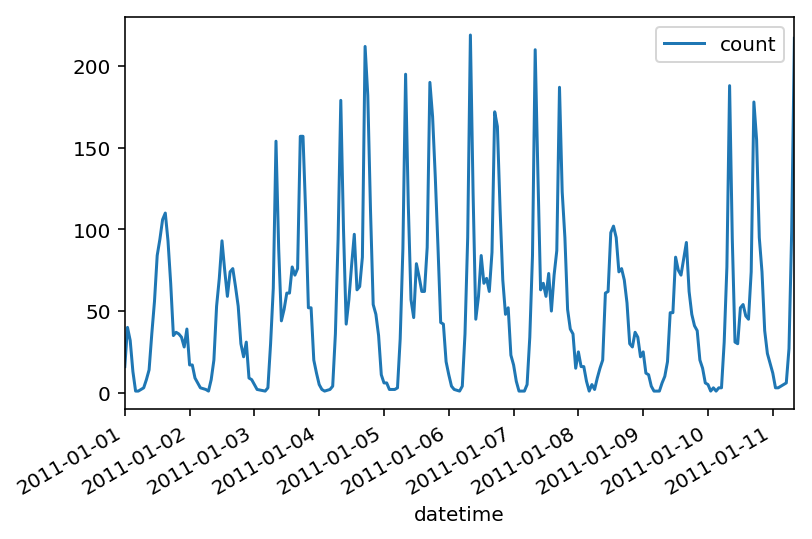

In [23]:
# First 30 days
rides[:24*10].plot(x='datetime', y='count')

In [24]:
# Apply "One Hot Encoding" on categorical variables
# You can use "pandas.get_dummies" library
dummy_fields = ['season', 'weather', 'workingday', 'holiday', 'hour', 'month']
for field in dummy_fields:
    dummy = pd.get_dummies(rides[field], prefix=field, drop_first=False)
    rides = pd.concat([rides, dummy], axis=1)

In [25]:
# Drop off some fields we don't need
drop_fields = ['datetime', 'season', 'weather', 'workingday', 'holiday', 'registered', 'casual', 'atemp', 'hour', 'month']
data = rides.drop(drop_fields, axis=1)
print (data.columns)

Index(['temp', 'humidity', 'windspeed', 'count', 'season_1', 'season_2',
       'season_3', 'season_4', 'weather_1', 'weather_2', 'weather_3',
       'weather_4', 'workingday_0', 'workingday_1', 'holiday_0', 'holiday_1',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'month_1',
       'month_2', 'month_3', 'month_4', 'month_5', 'month_6', 'month_7',
       'month_8', 'month_9', 'month_10', 'month_11', 'month_12'],
      dtype='object')


In [26]:
# Normalize the data.
# To get a higher accuracy, we need to normalized on its continous variable
# That is, each continous variable fields will have zero mean and standard deviation of 1
quant_features = ['count', 'temp', 'humidity', 'windspeed']
# We will need this mean/std for later !
# store scalings in a dictionary
scaled_features = {}
for each in quant_features:
    mean, std = data[each].mean(), data[each].std()
    scaled_features[each] = [mean, std]
    data.loc[:, each] = (data[each] - mean)/std

In [27]:
# Shuffle the data, and split into train and validation set
[train, valid] = train_test_split(data, test_size = 0.10)
# Quick check how does data look like now
print ("Train: {}\t Valid: {}".format(train.shape, valid.shape))

Train: (9797, 52)	 Valid: (1089, 52)


In [28]:
# Seperate our inputs(features) and output(target)
train_inputs, train_outputs = train.drop('count', axis=1), train['count']
valid_inputs, valid_outputs = valid.drop('count', axis=1), valid['count']
# Quick check how does data look like now
print ("Train Inputs: {}\t Train Outputs: {}".format(train_inputs.shape, train_outputs.shape))
print ("Valid Inputs: {}\t Valid Outputs: {}".format(valid_inputs.shape, valid_outputs.shape))

Train Inputs: (9797, 51)	 Train Outputs: (9797,)
Valid Inputs: (1089, 51)	 Valid Outputs: (1089,)


## Data preparation is done !
*** 